# Indeed WebScrapping
---

Task: Scrape data from a job search website


Website: Indeed.com

Objective: Collect job postings that match certain keywords and location filters, and then perform data analysis to extract insights about the job market.



# 1) Introduction

This project will scrape posts from the web: indeed.com to analyze and visualize the situation of the current employment market for data engineer in the US. This include:

        +Job title: specific title for the job in hiring (Ex: Senior/ Junior Data Engineer, Management Data Engineer,...)
        +Company: The company name that post the hiring news
        +Job Description:Describing the tasks that required for the job
        +Job location: where is the job in hiring (specific location or remote)
        +Date Posted: What date does the hiring post was uploaded

# 2) Data Scrapping

In [25]:
#import packages + regex
#webdriver
from selenium import webdriver
import re
import requests

#additional packages
import time
import random
import numpy as np

#data manipulation packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#define methods
def get_url(job_title, location, page):
    '''Generate a url from position and location'''
    
    #get url
    template = 'https://www.indeed.com/jobs?q={}&l={}%start={}'
    url = template.format(job_title, location, page)
    response = requests.get(url)
    
    return url
    
    
def get_job_info(jobs):
    '''get the job attributes'''
    
    #15 jobs per page
    for i in range(1,18):
        
        #find job's attributes
        #job title
        try:
            job_title = driver.find_element('xpath',\
                            '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[1]/h2'\
                                                   .format(i)).text
        except:
            job_title = "N/A"
     
        #compnay
        try:
            company = driver.find_element('xpath',\
                            '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/span[1]'\
                                                   .format(i)).text
        except:
            company = "N/A"
            
        #short description
        try:
            description = driver.find_element('xpath',\
                            '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div[1]/div'\
                                                   .format(i)).text
        except:
            description = "N/A"
            
        #location
        try:
            location = driver.find_element('xpath',\
                            '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[1]/tbody/tr/td/div[2]/div[1]'\
                                                   .format(i)).text
        except:
            location = "N/A"
        
        #date_posted
        try:
            date_posted = driver.find_element('xpath',\
                            '//*[@id="mosaic-provider-jobcards"]/ul/li[{}]/div/div[1]/div/div[1]/div/table[2]/tbody/tr[2]/td/div/span'\
                                                   .format(i)).text
        except:
            date_posted = "N/A"
        
        #append
        jobs.append([job_title, company, description, location, date_posted])
     
    #return info
    return jobs

In [27]:
# Set the URL of Indeed
url = "https://www.indeed.com/"

# Set the job title and location to search for
job_title = "data+engineer"
location = ""

In [28]:
#create a list
jobs = []

#loops through pages
for page in range(0, 991, 10):
    
    #using web-drivers
    print(page)
    driver = webdriver.Chrome("C:/Users/Dell/Downloads/chromedriver.exe")
    url = get_url(job_title, location, 1)
    driver.get(url)
    
    #get job's information in that page
    get_job_info(jobs)

    #quit driver
    driver.quit() 
    
    #random time sleep
    time.sleep(random.uniform(2,3))

0


C:\Users\Dell\AppData\Local\Temp\ipykernel_26408\3705288331.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/Dell/Downloads/chromedriver.exe")


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [206]:
#convert the data acquired to a pd-dataframe
jobs_df = pd.DataFrame(jobs, columns=['title','company','description','location','date_posted'])
jobs_df

title  \
0                                         Data Engineer   
1             Research Engineer (Software/Data Science)   
2     Big Data Full Stack Software Engineer (Top Sec...   
3                                   Cloud Data Engineer   
4                            Senior Cloud Data Engineer   
...                                                 ...   
1695                                Azure Data Engineer   
1696       Data Engineer with Cosmos DB or Cassandra DB   
1697                                      Data Engineer   
1698                                      Data Engineer   
1699             Junior Health Data Management Engineer   

                                 company  \
0                                Codazen   
1                             Voltserver   
2     Reinventing Geospatial, Inc. (RGi)   
3                               Deloitte   
4                  Wis Phys Svc Ins Corp   
...                                  ...   
1695   Integration Developer Network LLC   
1696                   Aptiva Healthcare   
1697                     N9 IT SOLUTIONS   
1698                              PSRTEK   
1699                         ThunderYard   

                                            description  \
0     Collaborate with software engineers to create ...   
1     Skill in working with large data sets.\nStrong...   
2     Rapidly prototype new methods for processing a...   
3     2+years of data engineering and architecture e...   
4     Experience developing new data platforms in th...   
...                                                 ...   
1695  Proven expertise with extracting data from a w...   
1696  Collaborate with data analysts and scientists ...   
1697  Experience in the Microsoft Azure stack of dat...   
1698  Please look for profile who worked as a Java d...   
1699  Evaluate and integrate data from multiple sour...   

                                               location  \
0                           Hybrid remote in Irvine, CA   
1                              East Greenwich, RI 02818   
2                          Hybrid remote in Herndon, VA   
3     Rosslyn, VA 22209 \n(Radnor-Ft Myer Heights area)   
4                           Remote in Madison, WI 53713   
...                                                 ...   
1695                                             Remote   
1696                                             Remote   
1697                                             Remote   
1698                                             Remote   
1699                                             Remote   

                       date_posted  
0      Posted\nPosted 30+ days ago  
1      Employer\nActive 9 days ago  
2       Posted\nPosted 17 days ago  
3      Posted\nPosted 30+ days ago  
4      Posted\nPosted 30+ days ago  
...                            ...  
1695   Posted\nPosted 30+ days ago  
1696     Posted\nPosted 4 days ago  
1697   Employer\nActive 8 days ago  
1698  Employer\nActive 18 days ago  
1699     Posted\nPosted 4 days ago  

[1700 rows x 5 columns]

# 2) Data Cleaning

Since for all the null data have been replaced with "N/A" in the scapping process, we does not need to inspect it anymore but let see a short description of our jobs_df.

In [207]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1700 non-null   object
 1   company      1700 non-null   object
 2   description  1700 non-null   object
 3   location     1700 non-null   object
 4   date_posted  1700 non-null   object
dtypes: object(5)
memory usage: 66.5+ KB


Let's drop down some duplicate rows

In [243]:
jobs_df.drop_duplicates()

title  \
0                                         Data Engineer   
1             Research Engineer (Software/Data Science)   
2     Big Data Full Stack Software Engineer (Top Sec...   
3                                   Cloud Data Engineer   
4                            Senior Cloud Data Engineer   
...                                                 ...   
1628              Senior Data Engineer - SQL, Snowflake   
1652                                      Data Engineer   
1655                          Data Engineer II - Python   
1666       ISD Engineer IV-Data Engineering (AI/ML/NLP)   
1693                       Sr Informatica Data Engineer   

                                 company  \
0                                Codazen   
1                             Voltserver   
2     Reinventing Geospatial, Inc. (RGi)   
3                               Deloitte   
4                  Wis Phys Svc Ins Corp   
...                                  ...   
1628                         CyberCoders   
1652                               Jobot   
1655                                Vaco   
1666           Navy Federal Credit Union   
1693                     The Judge Group   

                                            description location   date_posted  
0     Collaborate with software engineers to create ...   remote  30+ days ago  
1     Skill in working with large data sets.\nStrong...       RI    9 days ago  
2     Rapidly prototype new methods for processing a...   remote   17 days ago  
3     2+years of data engineering and architecture e...       VA  30+ days ago  
4     Experience developing new data platforms in th...   remote  30+ days ago  
...                                                 ...      ...           ...  
1628  If you are a Senior Data Engineer with excelle...   remote         today  
1652  Work with stakeholders to support their data i...   remote     1 day ago  
1655  Additionally, you will work in SQL for data ma...   remote   10 days ago  
1666  Partner with data analysts, data modelers and ...   remote  30+ days ago  
1693  Informatica expertise with an emphasis on work...       PA     1 day ago  

[310 rows x 5 columns]

The location column looks a little bit messy, let's change it into remote or just the 2 id of the state which the jobs in.

In [244]:
#clean text
for index, place in jobs_df['location'].iteritems():
    list_place = place.lower().split()
    
    #convert remote
    for word in list_place:
        if word == "remote":
           jobs_df.iloc[index, 3] = 'remote'
           finish = True

    while finish == False:
        #convert state to its initial
        try:
            place = re.findall(r'[A-Z]{2}', place)[0]
            jobs_df.iloc[index, 3] = place
        #non_value
        except:
            jobs_df.iloc[index, 3] = "N/A"
            
        #break loop
        finish = True
            
    
    #reset finish value
    finish = False

In [245]:
#printing out the data frame
jobs_df.head(5)

title  \
0                                      Data Engineer   
1          Research Engineer (Software/Data Science)   
2  Big Data Full Stack Software Engineer (Top Sec...   
3                                Cloud Data Engineer   
4                         Senior Cloud Data Engineer   

                              company  \
0                             Codazen   
1                          Voltserver   
2  Reinventing Geospatial, Inc. (RGi)   
3                            Deloitte   
4               Wis Phys Svc Ins Corp   

                                         description location   date_posted  
0  Collaborate with software engineers to create ...   remote  30+ days ago  
1  Skill in working with large data sets.\nStrong...       RI    9 days ago  
2  Rapidly prototype new methods for processing a...   remote   17 days ago  
3  2+years of data engineering and architecture e...       VA  30+ days ago  
4  Experience developing new data platforms in th...   remote  30+ days ago

Sucessfully converting location column! Now changing to the next colu,n we can observe that "\n" still being included because of the scrapping process. Let's strip it out!

In [246]:
for index, date in jobs_df['date_posted'].iteritems():
    
    #Non-value date
    if date == "N/A":
        new_date = ["N/A"]
        
    else:
        #convert for 30+ days
        new_date = re.findall(r'\d+\+? days ago', date)
    
        #convert for 1-30 days
        if new_date == []:
            new_date = re.findall(r'\d+ days ago', date)
            
            #convert 1 day (without s in day)
            if new_date == []:
                new_date  = re.findall(r'\d+ day ago', date)
            
                #convert today
                if new_date == []:
                    new_date = ["today"]
        
    #return date value
    jobs_df.iloc[index, 4] = new_date[0]
    
    #reset new_date value
    new_date = []

In [247]:
#printing the data frame
jobs_df.head(5)

title  \
0                                      Data Engineer   
1          Research Engineer (Software/Data Science)   
2  Big Data Full Stack Software Engineer (Top Sec...   
3                                Cloud Data Engineer   
4                         Senior Cloud Data Engineer   

                              company  \
0                             Codazen   
1                          Voltserver   
2  Reinventing Geospatial, Inc. (RGi)   
3                            Deloitte   
4               Wis Phys Svc Ins Corp   

                                         description location   date_posted  
0  Collaborate with software engineers to create ...   remote  30+ days ago  
1  Skill in working with large data sets.\nStrong...       RI    9 days ago  
2  Rapidly prototype new methods for processing a...   remote   17 days ago  
3  2+years of data engineering and architecture e...       VA  30+ days ago  
4  Experience developing new data platforms in th...   remote  30+ days ago

Missions accomplished! Now we have a good data for analyzing.

# 3) Data Analysis & Visualization

Let's inspect summary of this dataframe.

In [248]:
jobs_df.describe()

title company description location   date_posted
count            1700    1700        1700     1700          1700
unique            195     211         280       35            29
top     Data Engineer     N/A         N/A   remote  30+ days ago
freq              250     200         200     1006           321

Such a fascinating information! We are having 195 diffrent types of data engineer are being employed: some will work with the general data structure of the company, some will specialize in using sql to create relational database, some will be database administrator, some will be extremely skillful on tools such as AWS, Haadoop,... 

Let's observe company groupment.

In [249]:
jobs_df.groupby("company").agg({"title":"count"}).sort_values(by="title", ascending=False)

title
company                                 
N/A                                  200
Integration Developer Network LLC     94
Aptiva Healthcare                     89
ThunderYard                           75
N9 IT SOLUTIONS                       67
...                                  ...
Epsilon                                1
Envision                               1
Edutek, Ltd.                           1
EPM Scientific                         1
isolved                                1

[211 rows x 1 columns]

N/A usually represent hiring jobs through third contacts of HR. Hence, it usually come from small companies. It is interesting to find out that data engineer market are growing in small-industry sector. Below that, most of the companies are hiring for data engineers are tech companies. It is a little bit weird that we does not see Amazon with AWS. Perharps they prefer hiring through Linkedln than Indeed ?

Now, let's observe the location

In [250]:
jobs_df.groupby("location").agg({"title":"count"}).sort_values(by="title", ascending=False).head(10)

title
location       
remote     1006
N/A         201
VA           56
PA           47
FL           34
NY           33
NC           33
IL           28
CA           25
TX           20

A dominant number of data engineering jobs right now are preferred remote! This is a good new for people who sits in Florida, enjoying the summer, but can still work for big tech companies in Seattle or the Bay! Behind, most of the hirer does not provide their location also. I hope what they also means is remote is elligibe. Furthermore, it it such an interesting that the East Coast are hiring more than the East Coast such as Virgnia, Pennsylvania, FLorida, and New York,... Let's visualize this a little bit.

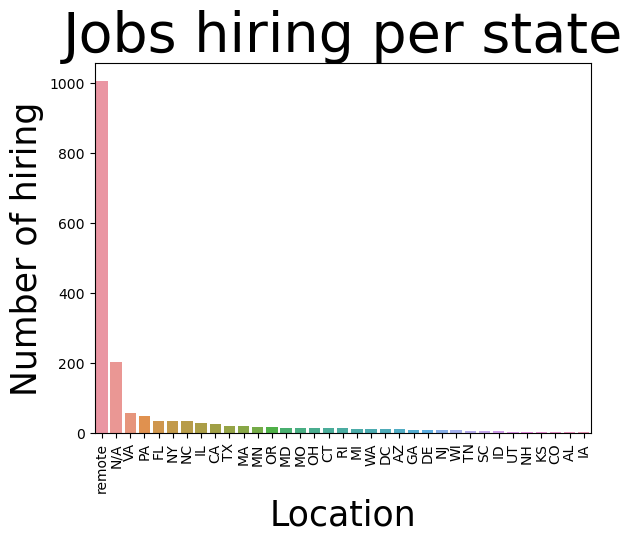

In [251]:
#countplot
sns.countplot(data=jobs_df, order=jobs_df['location'].value_counts().index, x="location")

#additional figures
plt.xticks(rotation = 90)
plt.title('Jobs hiring per state',  fontsize=40)
plt.ylabel('Number of hiring', fontsize=25)
plt.xlabel('Location', fontsize=25)
plt.show()

Let's inspect job titles

In [252]:
jobs_df["title"].value_counts()

Data Engineer                                       250
N/A                                                 200
Senior Data Engineer                                174
Azure Data Engineer                                 129
Data Engineer with Cosmos DB or Cassandra DB         89
                                                   ... 
Data Engineer - Azure Spark (Databricks)              1
Data Visualization Engineer- TS/SCI w poly            1
Tableau Data Visualization Engineer                   1
Data Science & Technology Integration - Engineer      1
Sr Informatica Data Engineer                          1
Name: title, Length: 195, dtype: int64

General Data Engineer still be one of the most high-demand jobs in the Data Engineer Market and then, it follows by data engineer who specializes in tools that manage datalakes,... Let's visualize this!

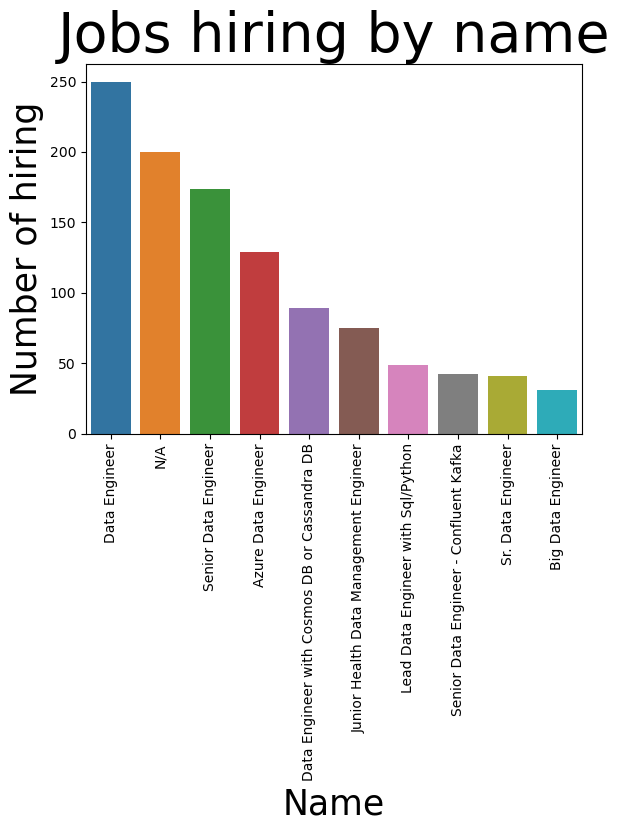

In [262]:
#create df
job_title = pd.DataFrame(jobs_df["title"].value_counts().head(10))

#barplot
sns.barplot(data=job_title, x=job_title.index, y= "title")

#additional figures
plt.xticks(rotation = 90)
plt.title('Jobs hiring by name',  fontsize=40)
plt.ylabel('Number of hiring', fontsize=25)
plt.xlabel('Name', fontsize=25)
plt.show()

Now let's analyze date posting

In [254]:
jobs_df.groupby("date_posted").agg({"title":"count"}).sort_values(by="title", ascending=False).head(10)

title
date_posted        
30+ days ago    321
N/A             200
4 days ago      199
today           159
8 days ago      107
10 days ago     100
11 days ago      95
5 days ago       88
9 days ago       63
18 days ago      61

There have been more than 300 jobs that have existed in indeed post for more than 1 months. This means that a the market is running under shortage of labor where many companies cannot find a perfect candidate to operate requiring tasks. Suprisingly, 4 days ago, there are roughly 200 jobs being submitted to indeed. Besides, there are 200 jobs that the poster does not show what is the date it was posting. Today, there are also 159 jobs are posting. Such a postive number for participant in this market.

Now let's visualize this.

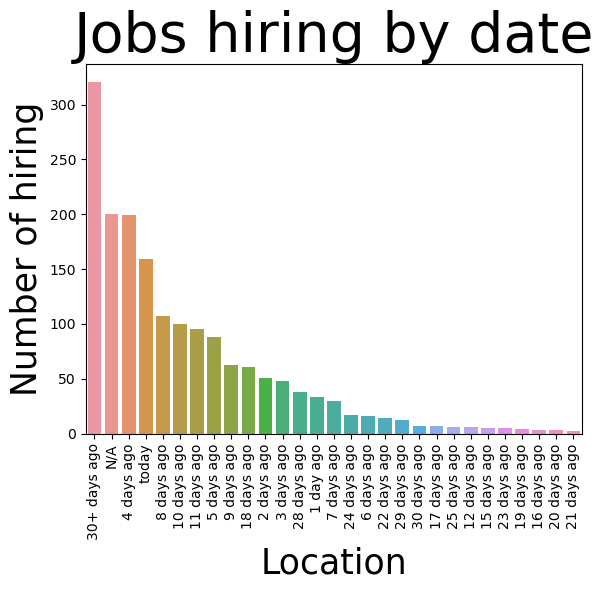

In [264]:
#countplot
sns.countplot(data=jobs_df, order=jobs_df['date_posted'].value_counts().index, x="date_posted")

#additional figures
plt.xticks(rotation = 90)
plt.title('Jobs hiring by date',  fontsize=40)
plt.ylabel('Number of hiring', fontsize=25)
plt.xlabel('Location', fontsize=25)
plt.show()

Now let's come to the hardes part: Text analysis. Let's analyze those short description. First, we will try to see what the most popular words in these descriptions

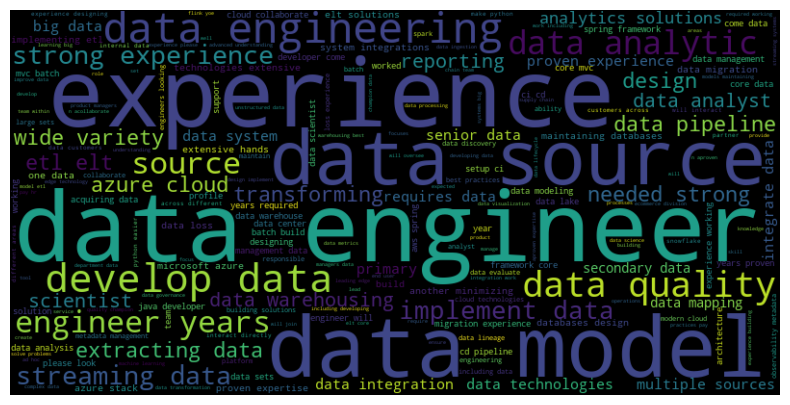

In [260]:
#import word cloud
from wordcloud import WordCloud

#text
text= ""
for index, description in jobs_df['description'].iteritems():
    text += description.lower()

text.split()  
# Create word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Create and display the plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the world cloud above, we can see that experience is the most important factor the any recruiters to look for. Besides that, we can see some skils and knowledge such as data model, extracting data, streaming data, design data pipeline, data analst, azure cloud, data technolofies, data warehousing, etc are also important factors that recruiter need from the applicants.

# 4) Summary

In general, we can conclude that the market for data engineer is extremely appealing when it is now in shortage of supply and the demand is ever increasing. Especially, many companies wants to hire general data engineer jobs (also in different levels such as senior, junior) and less demand for specialize data engineer jobs. Although data engineer are in shortage of supply, recruiters still expect that their candidates have some exprience in this field and knowledgeable in develop data and data model, how to stream and extract data, with other types of data skills, including data analysis. A big plus for this job is many companies allow their engineers to work remote.